In [82]:
# Para tratamiento de datos
import pandas as pd
import seaborn as sns
import numpy as np
import re

# Para Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels import stats
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Herramientas
from Toolbox_ML import *

import warnings
warnings.filterwarnings('ignore')

In [83]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df_train = pd.read_csv('./data/train.csv')


In [84]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [85]:
describe_df(df_train)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
Tipos,int64,int64,object,object,object,float64,object,object,object,object,object,object,object,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,912,912,19,475,6,15,35,104,8,36,91,9,158,614
% Cardinalidad,100.0,100.0,2.08,52.08,0.66,1.64,3.84,11.4,0.88,3.95,9.98,0.99,17.32,67.32


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


Información de las variables:   

**id**: Identificador único para cada entrada en el dataset.  
**laptop_ID**: Identificador específico para cada ordenador.   
**Company**: Marca   
**Product**: Nombre o modelo del producto específico.  
**TypeName**: Tipo de laptop (por ejemplo, Ultrabook, Gaming, Notebook).  
**Inches**: Tamaño de la pantalla de la laptop en pulgadas.  
**ScreenResolution**: Resolución de la pantalla (por ejemplo, 1920x1080).  
**Cpu**: Información sobre el procesador de la laptop (por ejemplo, Intel Core i7, AMD Ryzen 5).  
**Ram**: Cantidad de memoria RAM en la laptop (por ejemplo, 8GB, 16GB).  
**Memory**: Capacidad de almacenamiento interno de la laptop (por ejemplo, 256GB SSD, 1TB HDD).  
**Gpu**: Información sobre la tarjeta gráfica (por ejemplo, Nvidia GTX 1050, Intel UHD Graphics).  
**OpSys**: Sistema operativo instalado en la laptop (por ejemplo, Windows 10, macOS, Linux).  
**Weight**: Peso de la laptop (probablemente en kilogramos o gramos).  
**Price_euros**: Precio de la laptop en euros, que es la variable objetivo que quieres predecir  

In [87]:
df_train.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873
std,380.313813,384.873846,1.411744,714.597741
min,0.000000,1.000000,10.100000,174.000000
25%,319.750000,330.500000,14.000000,589.000000
50%,636.500000,673.500000,15.600000,949.000000
75%,980.250000,998.500000,15.600000,1458.500000
max,1302.000000,1320.000000,18.400000,6099.000000


In [88]:
target = "Price_euros"

<Axes: xlabel='Price_euros', ylabel='Count'>

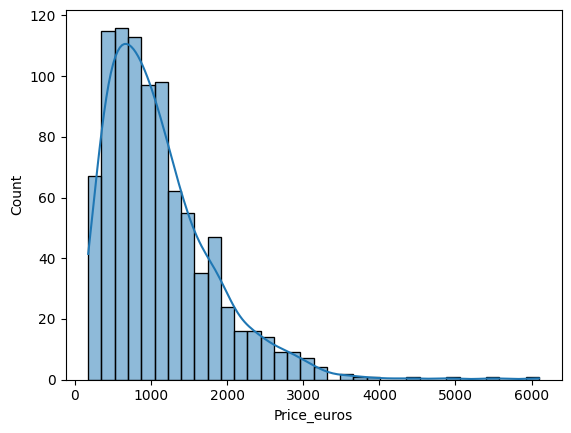

In [89]:
sns.histplot(x = target, data = df_train, kde = True)

In [90]:
value_counts_dict = {}

for col in df_train:
    value_counts_dict[col] = df_train[col].value_counts()

for col, counts in value_counts_dict.items():
    print(f"Value counts for column {col}:\n{counts}\n")

Value counts for column id:
id
268     1
67      1
39      1
703     1
568     1
       ..
53      1
981     1
1282    1
721     1
1179    1
Name: count, Length: 912, dtype: int64

Value counts for column laptop_ID:
laptop_ID
1002    1
945     1
374     1
158     1
960     1
       ..
691     1
632     1
1246    1
1240    1
1313    1
Name: count, Length: 912, dtype: int64

Value counts for column Company:
Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

Value counts for column Product:
Product
Inspiron 3567                                21
XPS 13                                       20
250 G6                                       19
Vostro 3568                                  16


In [91]:
unique_values_dict = {}
for col in df_train:
    unique_values_dict[col] = df_train[col].unique()

for col, unique_values in unique_values_dict.items():
    print(f"Unique values for column {col}:\n{unique_values}\n")

Unique values for column id:
[ 268  347  353  578   42  867 1136  609  474  838  851  904  355   44
   36  971  938  718  518 1126   51  772 1001  330   66  829 1129 1197
  171  233  205  361 1250  707  884 1071   95  745  899  313 1063  193
  625  142  243 1214 1047  648   34  804  872 1297  192  451  894  961
 1168  966  794  763  946 1298  715  762 1101  994  528  926  791  351
  166 1196 1056  909 1189  654  968 1027  217 1224  559  136  420   54
  788  628 1215  396 1083   20 1263  258  159  572  374   25  345  827
  661  102  185   69  327  439  662  799  555   40 1110  998  500  734
  974  117  392 1060  613  711 1245  639    9 1213  535  155 1074  472
   47    5  466  712  212 1067  785  332 1199  412  200  509  411  627
 1088  881  914  690  111   26  375  289 1007  476  475  125 1154 1184
  322  280   63  547 1293  536  687 1023  210  657  671  194  672 1152
  201  792  306  828 1055  813 1000  110  399  636 1264  318  172  293
  138  747  801   45 1262  923  879  931  730   

In [92]:
train_set, test_set = train_test_split(df_train, test_size= 0.2, random_state= 42) 

In [93]:
X_train = train_set.drop(target, axis = 1) # Tengo que limpiar las categóricas en numéricas 
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1) # Tengo que hacerle las mismas transformaciones que le haga a X_train
y_test = test_set[target]

In [94]:
X_train.shape

(729, 13)

In [95]:
y_train.shape

(729,)

In [96]:
X_test.shape

(183, 13)

In [97]:
y_test.shape

(183,)

In [98]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# Suponiendo que df es tu DataFrame completo y y_train es la serie de precios
# Filtrar las variables numéricas
numerical_features = X_train.select_dtypes(include=[np.number])

# Calcular las correlaciones de Pearson entre las variables numéricas y el precio
correlations = numerical_features.apply(lambda x: x.corr(y_train))
print("Correlaciones con el precio:")
print(correlations)


Correlaciones con el precio:
id          -0.012153
laptop_ID    0.019057
Inches       0.106196
dtype: float64


In [99]:
# Filtrar las variables categóricas
categorical_features = X_train.select_dtypes(exclude=[np.number])

# Realizar la prueba de Kruskal-Wallis para cada variable categórica
kruskal_results = {}
for col in categorical_features.columns:
    groups = [y_train[categorical_features[col] == val] for val in categorical_features[col].unique()]
    if len(groups) > 1:  # Asegurarse de que hay al menos dos grupos para comparar
        stat, p_value = kruskal(*groups)
        kruskal_results[col] = p_value

# Mostrar los resultados de Kruskal-Wallis
print("Resultados de Kruskal-Wallis (p-values):")
for feature, p_value in kruskal_results.items():
    print(f"{feature}: {p_value}")


Resultados de Kruskal-Wallis (p-values):
Company: 1.2072253753775862e-19
Product: 2.6416451417955966e-17
TypeName: 4.2148699064617125e-67
ScreenResolution: 3.854220859668881e-52
Cpu: 1.0581698703080007e-61
Ram: 5.461991079764444e-89
Memory: 3.3228913930612434e-72
Gpu: 3.511769026503102e-49
OpSys: 8.49150212185886e-21
Weight: 5.939825295153326e-26


Correlación ente columnas numéricas

In [100]:
# Limpiar 'Ram' y 'Weight'
X_train['Ram'] = X_train['Ram'].str.rstrip('GB').astype(int)
X_test['Ram'] = X_test['Ram'].str.rstrip('GB').astype(int)

X_train['Weight'] = X_train['Weight'].str.rstrip('kg').astype(float)
X_test['Weight'] = X_test['Weight'].str.rstrip('kg').astype(float)

# Limpiar 'Speed' y 'Cpu'
X_train['Speed'] = X_train['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)
X_train['Cpu'] = X_train['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)

X_test['Speed'] = X_test['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)
X_test['Cpu'] = X_test['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)

# Limpiar 'Product'
def procesar_columna(columna):
    if pd.notna(columna):
        lista_resultante = str(columna).split()
        if len(lista_resultante) >= 2:
            return f"{lista_resultante[0]} {lista_resultante[1]}"
        elif len(lista_resultante) == 1:
            return lista_resultante[0]
    return 'Unk'

X_train['Product'] = X_train['Product'].apply(procesar_columna)
X_test['Product'] = X_test['Product'].apply(procesar_columna)

# Limpiar 'Categoria'
def categorizar_por_marca(producto):
    if 'Aspire' in producto:
        return 'Acer Aspire'
    elif 'XPS' in producto or 'Inspiron' in producto:
        return 'Dell XPS/Inspiron'
    elif 'Elitebook' in producto or 'ProBook' in producto:
        return 'HP Elitebook/ProBook'
    elif 'IdeaPad' in producto or 'Legion' in producto:
        return 'Lenovo IdeaPad/Legion'
    else:
        return 'Otras Marcas'

X_train['Categoria'] = X_train['Product'].apply(categorizar_por_marca)
X_test['Categoria'] = X_test['Product'].apply(categorizar_por_marca)

# Limpiar 'Gpu_group'
def asignar_grupo(gpu_nombre):
    if re.search(r'Intel', gpu_nombre):
        return 'Intel'
    elif re.search(r'Nvidia', gpu_nombre):
        return 'Nvidia'
    elif re.search(r'AMD', gpu_nombre):
        return 'AMD'
    else:
        return 'Otro'

X_train['Gpu_group'] = X_train['Gpu'].apply(asignar_grupo)
X_test['Gpu_group'] = X_test['Gpu'].apply(asignar_grupo)

# Limpiar 'Disco' y 'Capacidad'
X_train['Disco'] = X_train['Memory'].str.extract('(HDD|SSD)', expand=False).fillna('Any')
X_test['Disco'] = X_test['Memory'].str.extract('(HDD|SSD)', expand=False).fillna('Any')

def procesar_capacidad(df, columna_capacidad):
    df['Capacidad_GB'] = 0
    df[columna_capacidad] = df[columna_capacidad].str.replace(r'(\d+)\.\d+?TB\s*(Hybrid)?', r'\1TB', regex=True)
    df[columna_capacidad] = df[columna_capacidad].str.strip()
    df['Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    add_gb = df[columna_capacidad].str.extract('(\d+)GB \+ (\d+)GB', expand=False)
    add_tb = df[columna_capacidad].str.extract('(\d+)TB \+ (\d+)TB', expand=False)
    mask_plus = df[columna_capacidad].str.contains('\+')
    
    df.loc[~mask_plus, 'Capacidad_GB'] = df[columna_capacidad].str.extract('(\d+)GB', expand=False).astype(float).fillna(0)
    df.loc[~mask_plus, 'Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    df['Capacidad_GB'] += add_gb[0].astype(float).fillna(0) + add_gb[1].astype(float).fillna(0)
    df['Capacidad_TB'] += add_tb[0].astype(float).fillna(0)
    df['Capacidad_TB'] += df['Capacidad_GB'] // 1000
    df['Capacidad_GB'] %= 1000
    return df

procesar_capacidad(X_train, 'Memory')
procesar_capacidad(X_test, 'Memory')

X_train.drop(columns=['Memory'], inplace=True)
X_test.drop(columns=['Memory'], inplace=True)

# Limpiar 'ScreenResolution'
def extraer_numeros_touch_calidad_ips(cadena):
    numeros = re.findall(r'\d+', cadena)
    touch = 'Touchscreen' in cadena
    calidad = re.search(r'(Full HD|Quad HD|4K Ultra HD|Retina Display)', cadena)
    calidad = calidad.group() if calidad else None
    ips_panel = 'IPS Panel' in cadena
    return {'Ancho': int(numeros[0]), 'Alto': int(numeros[1]), 'Touchscreen': touch, 'Calidad': calidad, 'IPS': ips_panel}

X_train[['Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS']] = X_train['ScreenResolution'].apply(extraer_numeros_touch_calidad_ips).apply(pd.Series)
X_test[['Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS']] = X_test['ScreenResolution'].apply(extraer_numeros_touch_calidad_ips).apply(pd.Series)


X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

X_train.drop(columns=['ScreenResolution'], inplace=True)
X_test.drop(columns=['ScreenResolution'], inplace=True)


In [101]:
# Seleccionar solo las columnas numéricas
numeric_columns = X_train.select_dtypes(include=['int', 'float']).columns

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = X_train[numeric_columns].corr()

# Imprimir la matriz de correlación
print(correlation_matrix)


                    id  laptop_ID    Inches       Ram    Weight     Speed  \
id            1.000000   0.009738  0.038052 -0.021972  0.053836  0.023517   
laptop_ID     0.009738   1.000000 -0.119979 -0.078897 -0.029661  0.071219   
Inches        0.038052  -0.119979  1.000000  0.265210  0.826690  0.282863   
Ram          -0.021972  -0.078897  0.265210  1.000000  0.447989  0.372111   
Weight        0.053836  -0.029661  0.826690  0.447989  1.000000  0.323633   
Speed         0.023517   0.071219  0.282863  0.372111  0.323633  1.000000   
Capacidad_GB -0.005778   0.015854 -0.260873 -0.095140 -0.327464 -0.035261   
Capacidad_TB  0.034658  -0.016224  0.474301  0.278928  0.494054  0.198511   
Ancho         0.013542  -0.026737 -0.095681 -0.026254 -0.120641  0.083090   
Alto         -0.016301  -0.062465 -0.010373  0.412390  0.064632  0.132925   

              Capacidad_GB  Capacidad_TB     Ancho      Alto  
id               -0.005778      0.034658  0.013542 -0.016301  
laptop_ID         0.015854

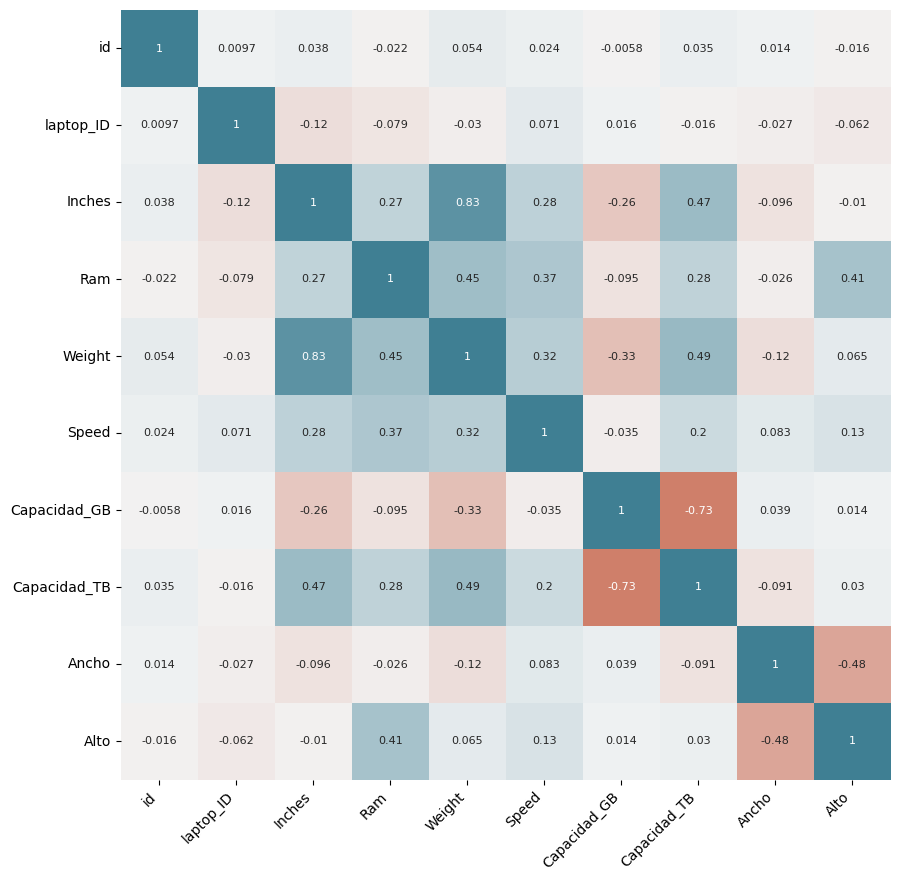

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    correlation_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            729 non-null    int64  
 1   laptop_ID     729 non-null    int64  
 2   Company       729 non-null    object 
 3   Product       729 non-null    object 
 4   TypeName      729 non-null    object 
 5   Inches        729 non-null    float64
 6   Cpu           729 non-null    object 
 7   Ram           729 non-null    int32  
 8   Gpu           729 non-null    object 
 9   OpSys         729 non-null    object 
 10  Weight        729 non-null    float64
 11  Speed         729 non-null    float64
 12  Categoria     729 non-null    object 
 13  Gpu_group     729 non-null    object 
 14  Disco         729 non-null    object 
 15  Capacidad_GB  729 non-null    float64
 16  Capacidad_TB  729 non-null    float64
 17  Ancho         729 non-null    int64  
 18  Alto          729 non-null    int6

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Identificar las características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Convertir todas las columnas categóricas a cadenas
X_train[categorical_features] = X_train[categorical_features].astype(str)

# Crear transformadores para las características numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Definir la cuadrícula de hiperparámetros para el RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],       # Número de árboles en el bosque
    'regressor__max_depth': [None, 10, 20, 30],           # Profundidad máxima del árbol
    'regressor__min_samples_split': [2, 5, 10],           # Número mínimo de muestras necesarias para dividir un nodo
    'regressor__min_samples_leaf': [1, 2, 4],             # Número mínimo de muestras necesarias en un nodo hoja
    'regressor__max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar para la mejor división
    'regressor__bootstrap': [True, False]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline_1, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

# Ajustar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Realizar predicciones en el conjunto de prueba con el mejor modelo encontrado
best_model_1 = grid_search.best_estimator_
y_pred_1 = best_model_1.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_1)
print("Error absoluto medio del modelo:", mae)


Mejores hiperparámetros: {'regressor__bootstrap': False, 'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Error absoluto medio del modelo: 205.6544710382514


In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            729 non-null    int64  
 1   laptop_ID     729 non-null    int64  
 2   Company       729 non-null    object 
 3   Product       729 non-null    object 
 4   TypeName      729 non-null    object 
 5   Inches        729 non-null    float64
 6   Cpu           729 non-null    object 
 7   Ram           729 non-null    int32  
 8   Gpu           729 non-null    object 
 9   OpSys         729 non-null    object 
 10  Weight        729 non-null    float64
 11  Speed         729 non-null    float64
 12  Categoria     729 non-null    object 
 13  Gpu_group     729 non-null    object 
 14  Disco         729 non-null    object 
 15  Capacidad_GB  729 non-null    float64
 16  Capacidad_TB  729 non-null    float64
 17  Ancho         729 non-null    int64  
 18  Alto          729 non-null    int6

In [106]:
df_test = pd.read_csv("./data/test.csv")

In [107]:
import pandas as pd
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Paso 1: Limpiar y preprocesar el conjunto de datos de prueba (df_test)

# Asegurarse de que todos los valores en 'Ram' y 'Weight' sean de tipo cadena
df_test['Ram'] = df_test['Ram'].astype(str)
df_test['Weight'] = df_test['Weight'].astype(str)

# Limpiar 'Ram' y 'Weight'
df_test['Ram'] = df_test['Ram'].str.rstrip('GB').astype(int)
df_test['Weight'] = df_test['Weight'].str.rstrip('kg').astype(float)

# Asegurarse de que todos los valores en 'Cpu' sean de tipo cadena
df_test['Cpu'] = df_test['Cpu'].astype(str)

# Limpiar 'Speed' y 'Cpu'
df_test['Speed'] = df_test['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)
df_test['Cpu'] = df_test['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)

# Asegurarse de que todos los valores en 'Product' sean de tipo cadena
df_test['Product'] = df_test['Product'].astype(str)

# Limpiar 'Product'
def procesar_columna(columna):
    if pd.notna(columna):
        lista_resultante = str(columna).split()
        if len(lista_resultante) >= 2:
            return f"{lista_resultante[0]} {lista_resultante[1]}"
        elif len(lista_resultante) == 1:
            return lista_resultante[0]
    return 'Unk'

df_test['Product'] = df_test['Product'].apply(procesar_columna)

# Limpiar 'Categoria'
def categorizar_por_marca(producto):
    if 'Aspire' in producto:
        return 'Acer Aspire'
    elif 'XPS' in producto or 'Inspiron' in producto:
        return 'Dell XPS/Inspiron'
    elif 'Elitebook' in producto or 'ProBook' in producto:
        return 'HP Elitebook/ProBook'
    elif 'IdeaPad' in producto or 'Legion' in producto:
        return 'Lenovo IdeaPad/Legion'
    else:
        return 'Otras Marcas'

df_test['Categoria'] = df_test['Product'].apply(categorizar_por_marca)

# Asegurarse de que todos los valores en 'Gpu' sean de tipo cadena
df_test['Gpu'] = df_test['Gpu'].astype(str)

# Limpiar 'Gpu_group'
def asignar_grupo(gpu_nombre):
    if re.search(r'Intel', gpu_nombre):
        return 'Intel'
    elif re.search(r'Nvidia', gpu_nombre):
        return 'Nvidia'
    elif re.search(r'AMD', gpu_nombre):
        return 'AMD'
    else:
        return 'Otro'

df_test['Gpu_group'] = df_test['Gpu'].apply(asignar_grupo)

# Asegurarse de que todos los valores en 'Memory' sean de tipo cadena
df_test['Memory'] = df_test['Memory'].astype(str)

# Limpiar 'Disco' y 'Capacidad'
df_test['Disco'] = df_test['Memory'].str.extract('(HDD|SSD)', expand=False).fillna('Any')

def procesar_capacidad(df, columna_capacidad):
    df['Capacidad_GB'] = 0
    df[columna_capacidad] = df[columna_capacidad].str.replace(r'(\d+)\.\d+?TB\s*(Hybrid)?', r'\1TB', regex=True)
    df[columna_capacidad] = df[columna_capacidad].str.strip()
    df['Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    add_gb = df[columna_capacidad].str.extract('(\d+)GB \+ (\d+)GB', expand=False)
    add_tb = df[columna_capacidad].str.extract('(\d+)TB \+ (\d+)TB', expand=False)
    mask_plus = df[columna_capacidad].str.contains('\+')
    
    df.loc[~mask_plus, 'Capacidad_GB'] = df[columna_capacidad].str.extract('(\d+)GB', expand=False).astype(float).fillna(0)
    df.loc[~mask_plus, 'Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    df['Capacidad_GB'] += add_gb[0].astype(float).fillna(0) + add_gb[1].astype(float).fillna(0)
    df['Capacidad_TB'] += add_tb[0].astype(float).fillna(0)
    df['Capacidad_TB'] += df['Capacidad_GB'] // 1000
    df['Capacidad_GB'] %= 1000
    return df

procesar_capacidad(df_test, 'Memory')

df_test.drop(columns=['Memory'], inplace=True)

# Asegurarse de que todos los valores en 'ScreenResolution' sean de tipo cadena
df_test['ScreenResolution'] = df_test['ScreenResolution'].astype(str)

# Limpiar 'ScreenResolution'
def extraer_numeros_touch_calidad_ips(cadena):
    numeros = re.findall(r'\d+', cadena)
    touch = 'Touchscreen' in cadena
    calidad = re.search(r'(Full HD|Quad HD|4K Ultra HD|Retina Display)', cadena)
    calidad = calidad.group() if calidad else None
    ips_panel = 'IPS Panel' in cadena
    return {'Ancho': int(numeros[0]), 'Alto': int(numeros[1]), 'Touchscreen': touch, 'Calidad': calidad, 'IPS': ips_panel}

df_test[['Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS']] = df_test['ScreenResolution'].apply(extraer_numeros_touch_calidad_ips).apply(pd.Series)

df_test.fillna(0, inplace=True)
df_test.drop(columns=['ScreenResolution'], inplace=True)


In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            391 non-null    int64  
 1   laptop_ID     391 non-null    int64  
 2   Company       391 non-null    object 
 3   Product       391 non-null    object 
 4   TypeName      391 non-null    object 
 5   Inches        391 non-null    float64
 6   Cpu           391 non-null    object 
 7   Ram           391 non-null    int32  
 8   Gpu           391 non-null    object 
 9   OpSys         391 non-null    object 
 10  Weight        391 non-null    float64
 11  Speed         391 non-null    float64
 12  Categoria     391 non-null    object 
 13  Gpu_group     391 non-null    object 
 14  Disco         391 non-null    object 
 15  Capacidad_GB  391 non-null    float64
 16  Capacidad_TB  391 non-null    float64
 17  Ancho         391 non-null    int64  
 18  Alto          391 non-null    

In [119]:
'''
# Definir las características numéricas y categóricas
numeric_features = ['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB', 'Ancho', 'Alto']
categorical_features = ['Product', 'Company', 'Cpu', 'Gpu', 'OpSys', 'Categoria', 'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS']

# Aplicar LabelEncoder y MinMaxScaler
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

for column in categorical_features:
    df_test[column] = label_encoder.fit_transform(df_test[column].astype(str))

df_test[categorical_features] = scaler.fit_transform(df_test[categorical_features])
df_test[numeric_features] = scaler.fit_transform(df_test[numeric_features])

'''
# Predicciones con el modelo entrenado
predictions_submit = best_model_1.predict(df_test)
print(predictions_submit)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
submission = pd.DataFrame({"laptop_ID": df_test['laptop_ID'], "Price_euros": predictions_submit}).reset_index().drop(columns = 'Company')


NameError: name 'predictions_submit' is not defined

In [ ]:
import urllib.request
from PIL import Image

def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
if df_to_submit.shape == submission.shape:
        if df_to_submit.columns.all() == submission.columns.all():
            if df_to_submit.laptop_ID.all() == submission.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")